In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
volsvc=pd.read_csv('/content/gdrive/MyDrive/dataPhilly_ElderNet/volunteer_services.csv',parse_dates=['appt_date'])
clientinfo=pd.read_csv('/content/gdrive/MyDrive/dataPhilly_ElderNet/Client_data2.csv')

In [4]:
volsvc.head(3)

,anon_ID,rider_first_ride_date,rider_last_ride_date,rider_num_rides,appt_date,appt_duration,category
0,276,2015-04-27,2021-11-16,0,2021-09-15,2.0,Doctor Appt
1,276,2015-04-27,2021-11-16,0,2021-09-01,2.0,Doctor Appt
2,276,2015-04-27,2021-11-16,0,2021-08-26,2.0,Doctor Appt


In [5]:
volsvc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4925 entries, 0 to 4924
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   anon_ID                4925 non-null   int64         
 1   rider_first_ride_date  4925 non-null   object        
 2   rider_last_ride_date   4925 non-null   object        
 3   rider_num_rides        4925 non-null   int64         
 4   appt_date              4925 non-null   datetime64[ns]
 5   appt_duration          4925 non-null   float64       
 6   category               4925 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 269.5+ KB


In [6]:
volsvc['rider_num_rides'].unique()

array([0])

In [7]:
# rider_num_rides provides no useful info (all zeros?)
volsvc=volsvc.drop('rider_num_rides',axis=1)

In [8]:
# How many categories?
volsvc['category'].unique()

array(['Doctor Appt', 'Errands', 'Shopping', 'Friendly Visit',
       'Skilled Work', 'Telephone Reassurance', 'Odd Jobs', 'Yard Work',
       'Pantry Delivery', 'Special Projects', 'Pantry',
       'Board or Committee Mtg'], dtype=object)

# Look at Volunary Services based on number of uses (assistance dates)

In [9]:
# Create sub DF of assistance_date and counts, sorted by date
assistsByDate_df=volsvc[['appt_date','anon_ID']].sort_values('appt_date',ascending=True)
assistsByDate_df.dropna(inplace=True)

# Create 2 column DF (date and count)
assistsByDate=assistsByDate_df.groupby('appt_date',as_index=False).count()
#assistsByDate.dropna(inplace=True)
assistsByDate.rename(columns={'anon_ID':'countByDate'},inplace=True)

# Calculate simple moving average
assistsByDate['SMA30'] = assistsByDate['countByDate'].rolling(30).mean()

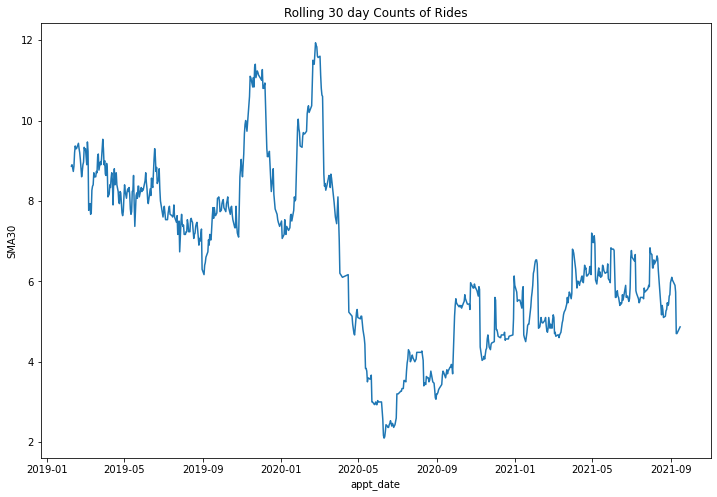

In [10]:
# Graph simple moving average over time
plt.figure(figsize=(12,8))
plt.title('Rolling 30 day Counts of Rides')
sns.lineplot(x='appt_date',y='SMA30',data=assistsByDate)

Conclusion:  For overall population the average number of rides dropped significantly during pandemic and has been slowly growing back, but not yet recvered to pre-pandemic levels.

Merge with Client Info and look at ride breakdown based on 
*  minority
*  poverty
*  age_group

In [11]:
# sort by anon_ID before merge
clientinfo.sort_values('anon_ID',inplace=True)
volsvc.sort_values('anon_ID',inplace=True)

# Merge Client info and Pantry data
combined_df=pd.merge(clientinfo, volsvc, on=['anon_ID'],how='outer') # use all keys

# sort by date before group_by
combined_df=combined_df.sort_values('appt_date',ascending=True)

# Create subset DF (date and count and poverty
combined_pov=combined_df[['appt_date', 'poverty']]

In [12]:
# Break into two groups (Poverty=Y/N), then plot rolling (30day) sums?
pov_y_df=combined_pov[combined_pov['poverty']=='Yes']
pov_n_df=combined_pov[combined_pov['poverty']=='No']

# Calculate counts per date
pov_y=pov_y_df.groupby('appt_date',as_index=False).count()
pov_n=pov_n_df.groupby('appt_date',as_index=False).count()
pov_y.rename(columns={'poverty':'countPovY'},inplace=True)
pov_n.rename(columns={'poverty':'countPovN'},inplace=True)

# Calculate rolline 30 day averages
pov_y['povY30']=pov_y['countPovY'].rolling(30).mean()
pov_n['povN30']=pov_n['countPovN'].rolling(30).mean()

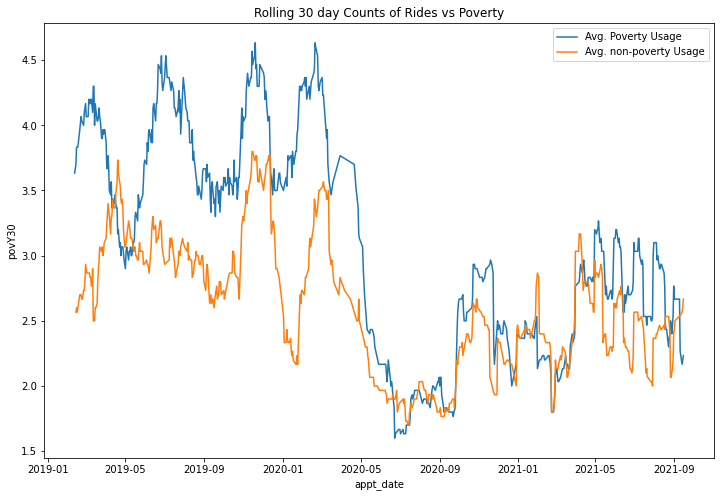

In [13]:
plt.figure(figsize=(12,8))
plt.title('Rolling 30 day Counts of Rides vs Poverty')
sns.lineplot(x='appt_date',y='povY30',data=pov_y, label="Avg. Poverty Usage")
sns.lineplot(x='appt_date',y='povN30',data=pov_n, label="Avg. non-poverty Usage")

Conclusion: ???

Breakdown by Minority

In [14]:
# Create subset DF (date and count and minority
combined_min=combined_df[['appt_date', 'minority']]

In [15]:
# Break into two groups (Minority=Y/N), then plot rolling (30day) averages?
min_y_df=combined_min[combined_min['minority']=='Yes']
min_n_df=combined_min[combined_min['minority']=='No']

# Calculate counts per date
min_y=min_y_df.groupby('appt_date',as_index=False).count()
min_n=min_n_df.groupby('appt_date',as_index=False).count()
min_y.rename(columns={'minority':'countMinY'},inplace=True)
min_n.rename(columns={'minority':'countMinN'},inplace=True)

# Calculate rolline 30 day averages
min_y['minY30']=min_y['countMinY'].rolling(30).mean()
min_n['minN30']=min_n['countMinN'].rolling(30).mean()

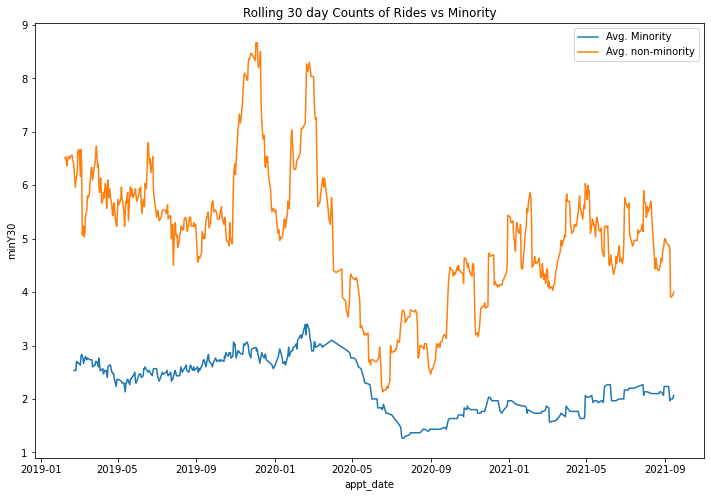

In [16]:
plt.figure(figsize=(12,8))
plt.title('Rolling 30 day Counts of Rides vs Minority')
sns.lineplot(x='appt_date',y='minY30',data=min_y, label="Avg. Minority")
sns.lineplot(x='appt_date',y='minN30',data=min_n, label="Avg. non-minority")

Conclusion:  non-minority usage is much higher than  minority usage.

Examine ride count by age group

In [17]:
# Create subset DF (date and count and age_group
combined_age=combined_df[['appt_date', 'age_group']]

In [18]:
age_G_df=combined_age[combined_age['age_group']=='G']
age_T_df=combined_age[combined_age['age_group']=='T']
age_P_df=combined_age[combined_age['age_group']=='P']
age_D_df=combined_age[combined_age['age_group']=='D']

# Calculate counts per date
age_G=age_G_df.groupby('appt_date',as_index=False).count()
age_T=age_T_df.groupby('appt_date',as_index=False).count()
age_P=age_P_df.groupby('appt_date',as_index=False).count()
age_D=age_D_df.groupby('appt_date',as_index=False).count()

age_G.rename(columns={'age_group':'countAgeG'},inplace=True)
age_T.rename(columns={'age_group':'countAgeT'},inplace=True)
age_P.rename(columns={'age_group':'countAgeP'},inplace=True)
age_D.rename(columns={'age_group':'countAgeD'},inplace=True)

# Calculate rolline 30 day averages
age_G['ageG30']=age_G['countAgeG'].rolling(30).mean()
age_T['ageT30']=age_T['countAgeT'].rolling(30).mean()
age_P['ageP30']=age_P['countAgeP'].rolling(30).mean()
age_D['ageD30']=age_D['countAgeD'].rolling(30).mean()

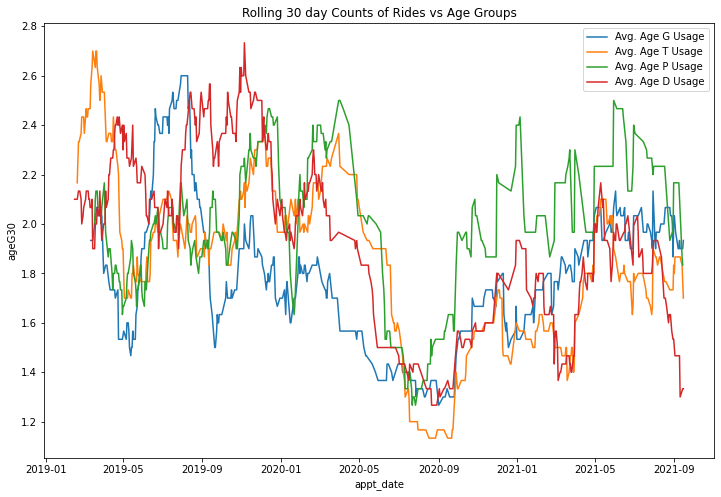

In [19]:
plt.figure(figsize=(12,8))
plt.title('Rolling 30 day Counts of Rides vs Age Groups')
sns.lineplot(x='appt_date',y='ageG30',data=age_G, label="Avg. Age G Usage")
sns.lineplot(x='appt_date',y='ageT30',data=age_T, label="Avg. Age T Usage")
sns.lineplot(x='appt_date',y='ageP30',data=age_P, label="Avg. Age P Usage")
sns.lineplot(x='appt_date',y='ageD30',data=age_D, label="Avg. Age D Usage")

Conclusion: ???

## On a per person basis, let us find last ride date, total duration of rides, and count of appointments by category

Calculate counts of rides by category

In [29]:
# Calculate count of appointments by anon_ID & "category"
countCat2=volsvc.groupby(['category'],as_index=False)['appt_date'].count().sort_values('appt_date',ascending=False)

# Calculate sum of all appointment durations
count_sum=countCat2['appt_date'].sum()

# add % column
countCat2['Percent']=(100 * countCat2['appt_date']/count_sum).map('{:.2f}'.format)

# Display total time per category
countCat2.head(12)

,category,appt_date,Percent
1,Doctor Appt,2102,42.68
7,Shopping,1158,23.51
0,Board or Committee Mtg,586,11.90
3,Friendly Visit,571,11.59
5,Pantry,273,5.54
2,Errands,79,1.60
9,Special Projects,56,1.14
4,Odd Jobs,43,0.87
6,Pantry Delivery,30,0.61
8,Skilled Work,20,0.41


[Text(0, 0, 'Doctor Appt'),
 Text(0, 0, 'Shopping'),
 Text(0, 0, 'Board or Committee Mtg'),
 Text(0, 0, 'Friendly Visit'),
 Text(0, 0, 'Pantry'),
 Text(0, 0, 'Errands'),
 Text(0, 0, 'Special Projects'),
 Text(0, 0, 'Odd Jobs'),
 Text(0, 0, 'Pantry Delivery'),
 Text(0, 0, 'Skilled Work'),
 Text(0, 0, 'Yard Work'),
 Text(0, 0, 'Telephone Reassurance')]

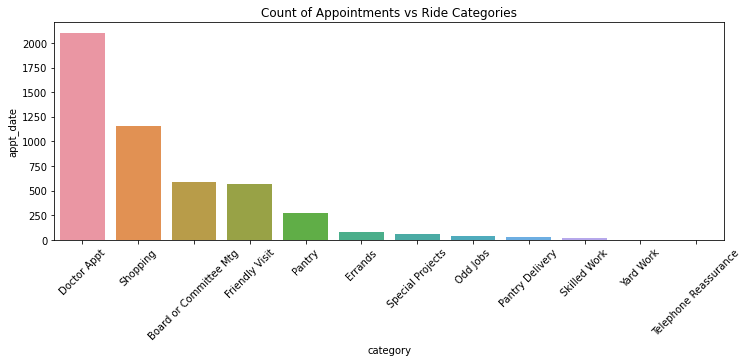

In [31]:
plt.figure(figsize=(12,4))
plt.title('Count of Appointments vs Ride Categories')
chart=sns.barplot(x='category',y='appt_date',data=countCat2)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

Conclusion:  Doctor's Appointments were the largest use at 43% of rides, followed by Shopping at 24% of rides.  When combined with Friendly Visit these three account for over 80% of rides.
<p>Should we drop "Board or Committee Mtg"?

Calculate duration of appointment times/rides

In [23]:
# Confirm they are not all the same first date
volsvc['rider_first_ride_date'].nunique()

147

In [32]:
# Find First & Last Appt Date
# First Ride Date seems suspicious, what if we use first appt_date instead?
# convert assistance_date "object" to "date" format
#volsvc['rider_first_ride_date']=pd.to_datetime(volsvc['rider_first_ride_date']).dt.date
volsvc['appt_date']=pd.to_datetime(volsvc['appt_date']).dt.date

# Append a column 'first_assist'
first_assist=volsvc.groupby(['anon_ID'])['appt_date'].min()
first_date_df=pd.DataFrame(first_assist)
first_date_df.rename(columns={'appt_date':'firstApptDate'},inplace=True)
volsvc=pd.merge(volsvc,first_date_df, on=['anon_ID'])

# Append a column 'last_assist'
last_assist=volsvc.groupby(['anon_ID'])['appt_date'].max()
last_date_df=pd.DataFrame(last_assist)
last_date_df.rename(columns={'appt_date':'lastApptDate'},inplace=True)
volsvc=pd.merge(volsvc,last_date_df, on=['anon_ID'])

# durationOfAssist = lastAssist - firstAssist
#volsvc['volDuration'] =volsvc['lastApptDate'] - volsvc['rider_first_ride_date']
volsvc['volDuration'] =volsvc['lastApptDate'] - volsvc['firstApptDate']

In [33]:
# Drop the columns with first date, last date, appt_date
volsvc=volsvc.drop('rider_first_ride_date',axis=1)
volsvc=volsvc.drop('rider_last_ride_date',axis=1)
volsvc=volsvc.drop('appt_date',axis=1)

Should I break sums into one column per category, like with CareMgt
or try to leverage "groupby" function?

In [34]:
# Calculate sum of appointment time by anon_ID &" category"
sumByCat2=volsvc.groupby(['category'],as_index=False)['appt_duration'].sum().sort_values('appt_duration',ascending=False)

# Calculate sum of all appointment durations
duration_sum=sumByCat2['appt_duration'].sum()

# add % column
sumByCat2['Percent']=(100 * sumByCat2['appt_duration']/duration_sum).map('{:.2f}'.format)

# Display total time per category
sumByCat2.head(12)

,category,appt_duration,Percent
1,Doctor Appt,4366.75,28.01
7,Shopping,3376.75,21.66
5,Pantry,2478.50,15.90
3,Friendly Visit,2086.25,13.38
0,Board or Committee Mtg,1353.00,8.68
9,Special Projects,793.50,5.09
8,Skilled Work,568.50,3.65
4,Odd Jobs,200.50,1.29
6,Pantry Delivery,156.50,1.00
2,Errands,147.25,0.94


[Text(0, 0, 'Doctor Appt'),
 Text(0, 0, 'Shopping'),
 Text(0, 0, 'Pantry'),
 Text(0, 0, 'Friendly Visit'),
 Text(0, 0, 'Board or Committee Mtg'),
 Text(0, 0, 'Special Projects'),
 Text(0, 0, 'Skilled Work'),
 Text(0, 0, 'Odd Jobs'),
 Text(0, 0, 'Pantry Delivery'),
 Text(0, 0, 'Errands'),
 Text(0, 0, 'Yard Work'),
 Text(0, 0, 'Telephone Reassurance')]

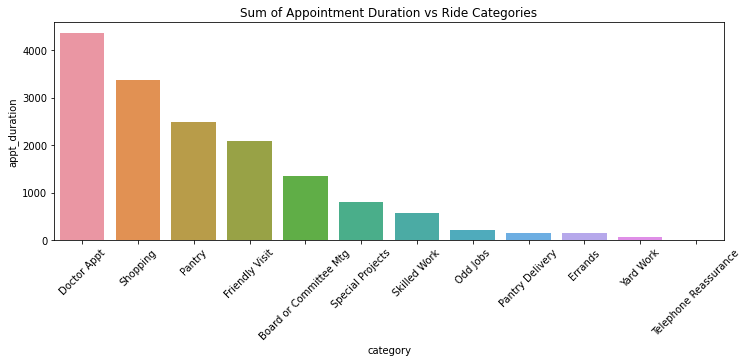

In [35]:
plt.figure(figsize=(12,4))
plt.title('Sum of Appointment Duration vs Ride Categories')
chart=sns.barplot(x='category',y='appt_duration',data=sumByCat2)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

Conclusion:  By far most time spent on Doctor's Appointments, Shopping, Pantry and Friendly Visits
<p> Should "Board or Committee Mtg" be dropped from this?

In [36]:
# How many categories?
volsvc['category'].unique()

array(['Doctor Appt', 'Friendly Visit', 'Shopping', 'Errands', 'Odd Jobs',
       'Yard Work', 'Skilled Work', 'Special Projects',
       'Board or Committee Mtg', 'Pantry Delivery',
       'Telephone Reassurance', 'Pantry'], dtype=object)

In [37]:
# Need to separate into columns per category
# While not strictly needed for adding, will make it simpler to explain.
doctor_L=[]
errands_L=[]
shopping_L=[]
friendly_L=[]
skilled_L=[]
telephone_L=[]
oddJobs_L=[]
yardWork_L=[]
pantryDelivery_L=[]
special_L=[]
pantry_L=[]
mtg_L=[]

for ind in volsvc.index:
  if (volsvc['category'][ind] == 'Doctor Appt'):
    doctor_L.append(volsvc['appt_duration'][ind])
    errands_L.append('0')
    shopping_L.append('0')
    friendly_L.append('0')
    skilled_L.append('0')
    telephone_L.append('0')
    oddJobs_L.append('0')
    yardWork_L.append('0')
    pantryDelivery_L.append('0')
    special_L.append('0')
    pantry_L.append('0')
    mtg_L.append('0')
  elif (volsvc['category'][ind] == 'Errands'):
    doctor_L.append('0')
    errands_L.append(volsvc['appt_duration'][ind])
    shopping_L.append('0')
    friendly_L.append('0')
    skilled_L.append('0')
    telephone_L.append('0')
    oddJobs_L.append('0')
    yardWork_L.append('0')
    pantryDelivery_L.append('0')
    special_L.append('0')
    pantry_L.append('0')
    mtg_L.append('0')
  elif (volsvc['category'][ind] == 'Shopping'):
    doctor_L.append('0')
    errands_L.append('0')
    shopping_L.append(volsvc['appt_duration'][ind])
    friendly_L.append('0')
    skilled_L.append('0')
    telephone_L.append('0')
    oddJobs_L.append('0')
    yardWork_L.append('0')
    pantryDelivery_L.append('0')
    special_L.append('0')
    pantry_L.append('0')
    mtg_L.append('0')
  elif (volsvc['category'][ind] == 'Friendly Visit'):
    doctor_L.append('0')
    errands_L.append('0')
    shopping_L.append('0')
    friendly_L.append(volsvc['appt_duration'][ind])
    skilled_L.append('0')
    telephone_L.append('0')
    oddJobs_L.append('0')
    yardWork_L.append('0')
    pantryDelivery_L.append('0')
    special_L.append('0')
    pantry_L.append('0')
    mtg_L.append('0')
  elif (volsvc['category'][ind] == 'Skilled Work'):
    doctor_L.append('0')
    errands_L.append('0')
    shopping_L.append('0')
    friendly_L.append('0')
    skilled_L.append(volsvc['appt_duration'][ind])
    telephone_L.append('0')
    oddJobs_L.append('0')
    yardWork_L.append('0')
    pantryDelivery_L.append('0')
    special_L.append('0')
    pantry_L.append('0')
    mtg_L.append('0')
  elif (volsvc['category'][ind] == 'Telephone Reassurance'):
    doctor_L.append('0')
    errands_L.append('0')
    shopping_L.append('0')
    friendly_L.append('0')
    skilled_L.append('0')
    telephone_L.append(volsvc['appt_duration'][ind])
    oddJobs_L.append('0')
    yardWork_L.append('0')
    pantryDelivery_L.append('0')
    special_L.append('0')
    pantry_L.append('0')
    mtg_L.append('0')
  elif (volsvc['category'][ind] == 'Odd Jobs'):
    doctor_L.append('0')
    errands_L.append('0')
    shopping_L.append('0')
    friendly_L.append('0')
    skilled_L.append('0')
    telephone_L.append('0')
    oddJobs_L.append(volsvc['appt_duration'][ind])
    yardWork_L.append('0')
    pantryDelivery_L.append('0')
    special_L.append('0')
    pantry_L.append('0')
    mtg_L.append('0')
  elif (volsvc['category'][ind] == 'Yard Work'):
    doctor_L.append('0')
    errands_L.append('0')
    shopping_L.append('0')
    friendly_L.append('0')
    skilled_L.append('0')
    telephone_L.append('0')
    oddJobs_L.append('0')
    yardWork_L.append(volsvc['appt_duration'][ind])
    pantryDelivery_L.append('0')
    special_L.append('0')
    pantry_L.append('0')
    mtg_L.append('0')
  elif (volsvc['category'][ind] == 'Pantry Delivery'):
    doctor_L.append('0')
    errands_L.append('0')
    shopping_L.append('0')
    friendly_L.append('0')
    skilled_L.append('0')
    telephone_L.append('0')
    oddJobs_L.append('0')
    yardWork_L.append('0')
    pantryDelivery_L.append(volsvc['appt_duration'][ind])
    special_L.append('0')
    pantry_L.append('0')
    mtg_L.append('0')
  elif (volsvc['category'][ind] == 'Special Projects'):
    doctor_L.append('0')
    errands_L.append('0')
    shopping_L.append('0')
    friendly_L.append('0')
    skilled_L.append('0')
    telephone_L.append('0')
    oddJobs_L.append('0')
    yardWork_L.append('0')
    pantryDelivery_L.append('0')
    special_L.append(volsvc['appt_duration'][ind])
    pantry_L.append('0')
    mtg_L.append('0')
  elif (volsvc['category'][ind] == 'Pantry'):
    doctor_L.append('0')
    errands_L.append('0')
    shopping_L.append('0')
    friendly_L.append('0')
    skilled_L.append('0')
    telephone_L.append('0')
    oddJobs_L.append('0')
    yardWork_L.append('0')
    pantryDelivery_L.append('0')
    special_L.append('0')
    pantry_L.append(volsvc['appt_duration'][ind])
    mtg_L.append('0')
  elif (volsvc['category'][ind] == 'Board or Committee Mtg'):
    doctor_L.append('0')
    errands_L.append('0')
    shopping_L.append('0')
    friendly_L.append('0')
    skilled_L.append('0')
    telephone_L.append('0')
    oddJobs_L.append('0')
    yardWork_L.append('0')
    pantryDelivery_L.append('0')
    special_L.append('0')
    pantry_L.append('0')
    mtg_L.append(volsvc['appt_duration'][ind])
  else:
    doctor_L.append('0')
    errands_L.append('0')
    shopping_L.append('0')
    friendly_L.append('0')
    skilled_L.append('0')
    telephone_L.append('0')
    oddJobs_L.append('0')
    yardWork_L.append('0')
    pantryDelivery_L.append('0')
    special_L.append('0')
    pantry_L.append('0')
    mtg_L.append('0')

In [39]:
# Append new category/unit columns
volsvc['doctorMinutes']=pd.DataFrame(doctor_L).astype(float)
volsvc['errandMinutes']=pd.DataFrame(errands_L).astype(float)
volsvc['shoppingMinutes']=pd.DataFrame(shopping_L).astype(float)
volsvc['friendlyMinutes']=pd.DataFrame(friendly_L).astype(float)
volsvc['skilledMinutes']=pd.DataFrame(skilled_L).astype(float)
volsvc['telephoneMinutes']=pd.DataFrame(telephone_L).astype(float)
volsvc['oddJobMinutes']=pd.DataFrame(oddJobs_L).astype(float)
volsvc['yardworkMinutes']=pd.DataFrame(yardWork_L).astype(float)
volsvc['pantryDeliveryMinutes']=pd.DataFrame(pantryDelivery_L).astype(float)
volsvc['specialMinutes']=pd.DataFrame(special_L).astype(float)
volsvc['pantryMinutes']=pd.DataFrame(pantry_L).astype(float)
volsvc['mtgMinutes']=pd.DataFrame(mtg_L).astype(float)

In [41]:
# Append countOfAssists (total count, not subdivided by type)
# How to do this via one subroutine?
countOfAssists=volsvc.groupby(['anon_ID'])['doctorMinutes'].count()
countOfAssists_df=pd.DataFrame(countOfAssists)
countOfAssists_df.rename(columns={'doctorMinutes':'countOfDoctor'},inplace=True)
volsvc=pd.merge(volsvc,countOfAssists_df, on=['anon_ID'])

countOfAssists=volsvc.groupby(['anon_ID'])['errandMinutes'].count()
countOfAssists_df=pd.DataFrame(countOfAssists)
countOfAssists_df.rename(columns={'errandMinutes':'countOfErrand'},inplace=True)
volsvc=pd.merge(volsvc,countOfAssists_df, on=['anon_ID'])

countOfAssists=volsvc.groupby(['anon_ID'])['shoppingMinutes'].count()
countOfAssists_df=pd.DataFrame(countOfAssists)
countOfAssists_df.rename(columns={'shoppingMinutes':'countOfShopping'},inplace=True)
volsvc=pd.merge(volsvc,countOfAssists_df, on=['anon_ID'])

countOfAssists=volsvc.groupby(['anon_ID'])['friendlyMinutes'].count()
countOfAssists_df=pd.DataFrame(countOfAssists)
countOfAssists_df.rename(columns={'friendlyMinutes':'countOfFriendly'},inplace=True)
volsvc=pd.merge(volsvc,countOfAssists_df, on=['anon_ID'])

countOfAssists=volsvc.groupby(['anon_ID'])['skilledMinutes'].count()
countOfAssists_df=pd.DataFrame(countOfAssists)
countOfAssists_df.rename(columns={'skilledMinutes':'countOfSkilled'},inplace=True)
volsvc=pd.merge(volsvc,countOfAssists_df, on=['anon_ID'])

countOfAssists=volsvc.groupby(['anon_ID'])['telephoneMinutes'].count()
countOfAssists_df=pd.DataFrame(countOfAssists)
countOfAssists_df.rename(columns={'telephoneMinutes':'countOfTelephone'},inplace=True)
volsvc=pd.merge(volsvc,countOfAssists_df, on=['anon_ID'])

countOfAssists=volsvc.groupby(['anon_ID'])['oddJobMinutes'].count()
countOfAssists_df=pd.DataFrame(countOfAssists)
countOfAssists_df.rename(columns={'oddJobMinutes':'countOfOddJob'},inplace=True)
volsvc=pd.merge(volsvc,countOfAssists_df, on=['anon_ID'])

countOfAssists=volsvc.groupby(['anon_ID'])['yardworkMinutes'].count()
countOfAssists_df=pd.DataFrame(countOfAssists)
countOfAssists_df.rename(columns={'yardworkMinutes':'countOfYardwork'},inplace=True)
volsvc=pd.merge(volsvc,countOfAssists_df, on=['anon_ID'])

countOfAssists=volsvc.groupby(['anon_ID'])['pantryDeliveryMinutes'].count()
countOfAssists_df=pd.DataFrame(countOfAssists)
countOfAssists_df.rename(columns={'pantryDeliveryMinutes':'countOfPantryDlvy'},inplace=True)
volsvc=pd.merge(volsvc,countOfAssists_df, on=['anon_ID'])

countOfAssists=volsvc.groupby(['anon_ID'])['specialMinutes'].count()
countOfAssists_df=pd.DataFrame(countOfAssists)
countOfAssists_df.rename(columns={'specialMinutes':'countOfSpecial'},inplace=True)
volsvc=pd.merge(volsvc,countOfAssists_df, on=['anon_ID'])

countOfAssists=volsvc.groupby(['anon_ID'])['pantryMinutes'].count()
countOfAssists_df=pd.DataFrame(countOfAssists)
countOfAssists_df.rename(columns={'pantryMinutes':'countOfPantry'},inplace=True)
volsvc=pd.merge(volsvc,countOfAssists_df, on=['anon_ID'])

countOfAssists=volsvc.groupby(['anon_ID'])['mtgMinutes'].count()
countOfAssists_df=pd.DataFrame(countOfAssists)
countOfAssists_df.rename(columns={'mtgMinutes':'countOfMtg'},inplace=True)
volsvc=pd.merge(volsvc,countOfAssists_df, on=['anon_ID'])


In [42]:
# Drop category
volsvc=volsvc.drop('category',axis=1)

In [43]:
# Calculate sum by each new column (doctorMinutes, errandMinutes,  etc.)
# pantry pounds
#  Create a list of sums by ID
#  Create temporary dataframe with that list
#  Rename the new column to reflect it is a sum
#  Merge that dataframe with the main one

#ERROR:  This does not work, it creates every column each loop.

myList=('doctorMinutes','errandMinutes','shoppingMinutes','friendlyMinutes','skilledMinutes','telephoneMinutes','oddJobMinutes','yardworkMinutes','pantryDeliveryMinutes','specialMinutes','pantryMinutes','mtgMinutes')
#myList=('doctorMinutes','errandMinutes')
for item in myList:
  print(item)
  #mySums=volsvc.groupby([['anon_ID',df['category']==cat])["{0}".format(cat)].sum()
  #mySums=volsvc.groupby(['anon_ID'])['@item'].sum()
  mySums=volsvc.groupby(['anon_ID'])[item].sum()
  newLabel= 'SUM' + item
  mySums_df=pd.DataFrame(mySums)
  mySums_df.rename(columns={item:newLabel},inplace=True)
  volsvc=pd.merge(volsvc,mySums_df, on=['anon_ID'])

doctorMinutes
errandMinutes
shoppingMinutes
friendlyMinutes
skilledMinutes
telephoneMinutes
oddJobMinutes
yardworkMinutes
pantryDeliveryMinutes
specialMinutes
pantryMinutes
mtgMinutes


In [75]:
# Calculate sum by each new column (doctorMinutes, errandMinutes,  etc.)
# pantry pounds
#  Create a list of sums by ID
#  Create temporary dataframe with that list
#  Rename the new column to reflect it is a sum
#  Merge that dataframe with the main one
#  There should be a better way to write subroutine and loop through list of categories
#mySums=volsvc.groupby(['anon_ID'])['doctorMinutes'].sum()
#mySums_df=pd.DataFrame(mySums)
#mySums_df.rename(columns={'doctorMinutes':'sumDoctorMinutes'},inplace=True)
#volsvc=pd.merge(volsvc,mySums_df, on=['anon_ID'])

In [44]:
# Drop duplicate rows
volsvc.drop_duplicates(subset='anon_ID',inplace=True)

In [45]:
# Drop "Mintues" columns now that they are summed up
myList=('doctorMinutes','errandMinutes','shoppingMinutes','friendlyMinutes','skilledMinutes','telephoneMinutes','oddJobMinutes','yardworkMinutes','pantryDeliveryMinutes','specialMinutes','pantryMinutes','mtgMinutes')
#myList=('doctorMinutes','errandMinutes')
for item in myList:
  volsvc=volsvc.drop(item,axis=1)

# Drop appd_duration
volsvc=volsvc.drop('appt_duration',axis=1)

In [46]:
volsvc.head(6)

,anon_ID,firstApptDate,lastApptDate,volDuration,countOfDoctor,countOfErrand,countOfShopping,countOfFriendly,countOfSkilled,countOfTelephone,...,SUMshoppingMinutes,SUMfriendlyMinutes,SUMskilledMinutes,SUMtelephoneMinutes,SUModdJobMinutes,SUMyardworkMinutes,SUMpantryDeliveryMinutes,SUMspecialMinutes,SUMpantryMinutes,SUMmtgMinutes
0,2,2020-02-18,2021-05-11,448 days,28,28,28,28,28,28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28,3,2019-08-29,2020-09-10,378 days,6,6,6,6,6,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34,4,2019-01-14,2019-12-16,336 days,34,34,34,34,34,34,...,0.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68,7,2019-03-28,2021-09-13,900 days,14,14,14,14,14,14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82,8,2019-01-23,2021-09-15,966 days,86,86,86,86,86,86,...,0.0,20.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168,9,2019-05-02,2020-05-16,380 days,2,2,2,2,2,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
volsvc.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
anon_ID,162.0,330.820988,187.263554,2.0,175.75,332.5,493.5,641.0
volDuration,162,481 days 15:06:40,368 days 06:26:52.968437976,0 days 00:00:00,117 days 06:00:00,416 days 00:00:00,894 days 00:00:00,987 days 00:00:00
countOfDoctor,162.0,30.401235,53.978424,1.0,5.0,14.0,34.75,529.0
countOfErrand,162.0,30.401235,53.978424,1.0,5.0,14.0,34.75,529.0
countOfShopping,162.0,30.401235,53.978424,1.0,5.0,14.0,34.75,529.0
countOfFriendly,162.0,30.401235,53.978424,1.0,5.0,14.0,34.75,529.0
countOfSkilled,162.0,30.401235,53.978424,1.0,5.0,14.0,34.75,529.0
countOfTelephone,162.0,30.401235,53.978424,1.0,5.0,14.0,34.75,529.0
countOfOddJob,162.0,30.401235,53.978424,1.0,5.0,14.0,34.75,529.0
countOfYardwork,162.0,30.401235,53.978424,1.0,5.0,14.0,34.75,529.0


Q. Should we analyze usage by ID per category?

In [26]:
volsvc.to_csv('/content/gdrive/MyDrive/dataPhilly_ElderNet/volsvc_flat.csv')